In [1]:
import pandas as pd 
import numpy as np
from lppy import locproj
from matplotlib import pyplot as plt

#Working to replicate research on monetary policy shocks using the following data
#https://www.michaeldbauer.com/publication/mps/

df = pd.read_excel('https://www.michaeldbauer.com/files/FOMC_Bauer_Swanson.xlsx',sheet_name='Monthly SVAR Data',index_col=0)


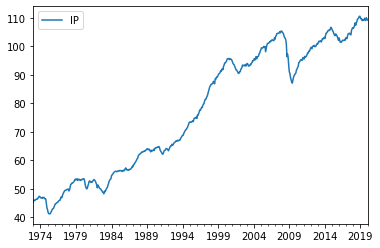

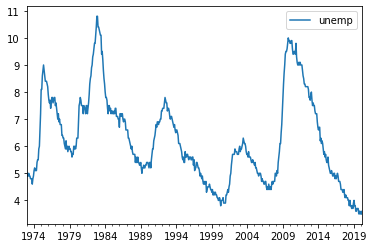

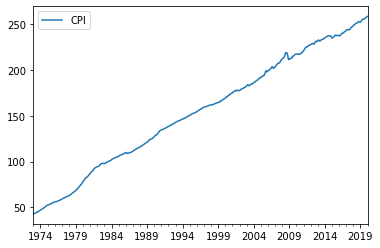

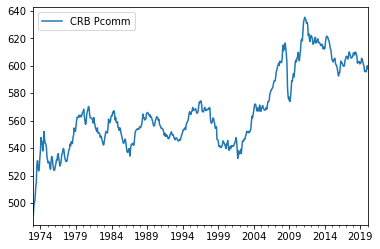

In [2]:
#Data transformation steps
variables_of_interest = ['IP','unemp','CPI','CRB Pcomm']


#plot the variables & generate percentage changes & lags 
for var in variables_of_interest:   
    df.plot(y=var, use_index=True, kind='line')
    df[f'{var}_pc'] = 100*df[var].pct_change(12)
    for lag in range(1,12):
        df[f'{var}_L{lag}'] = 100*df[f'{var}_pc'].shift(lag)
        
#add linear and quadratic time trend
df['t_lin'] = np.arange(df.shape[0])
df['t_quad'] = resp = np.power(df['t_lin'], 2)


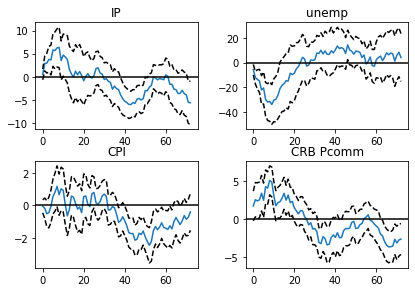

In [3]:
#Analysis begins here
df_trim = df.loc['1990-1-1':'2019-1-1']
#reg_df = df_trim[['MPS','t_lin','t_quad']].copy().to_numpy()
reg_df = df_trim[['MPS','IP_L1','unemp_L1','CPI_L1']].copy().to_numpy()

#Subplots of the impulse responses
fig, axs = plt.subplots(2,2)
fig.tight_layout()
plt.rcParams['figure.figsize'] = [8, 5]
row = 0
plot_idx = 0

#loop over variables of interest in percentage form 
for idx, var in enumerate(variables_of_interest):
    
    Y = df_trim[f'{var}_pc'].copy().to_numpy()
    irf = locproj(reg_df,Y,0,72,68)
    
    #If statement for subplot indexing 
    if idx == 2:
        row = 1
        plot_idx = 0
        
    axs[row,plot_idx].plot(irf.resp)
    axs[row,plot_idx].set_title(var)
    axs[row,plot_idx].plot(irf.se_high,'--k')
    axs[row,plot_idx].plot(irf.se_low,'--k')
    axs[row,plot_idx].axhline(y = 0, color = 'black', linestyle = '-')
    plot_idx = plot_idx+1

